In [ ]:
# Import Required Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Let us load the data from csv file
df=pd.read_csv("Electric_Vehicle_Population_Data.csv")
df.shape

(247344, 17)

In [ ]:
# Let us verify the basic information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247344 entries, 0 to 247343
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         247344 non-null  object 
 1   County                                             247340 non-null  object 
 2   City                                               247340 non-null  object 
 3   State                                              247344 non-null  object 
 4   Postal Code                                        247340 non-null  float64
 5   Model Year                                         247344 non-null  int64  
 6   Make                                               247344 non-null  object 
 7   Model                                              247344 non-null  object 
 8   Electric Vehicle Type                              247344 non-null  object

# **Data Cleaning:**

1. Missing Values

2. Outliers

3. Duplicates

In [ ]:
# Let us find missing values if any
df.isnull().any()

,0
VIN (1-10),False
County,True
City,True
State,False
Postal Code,True
Model Year,False
Make,False
Model,False
Electric Vehicle Type,False
Clean Alternative Fuel Vehicle (CAFV) Eligibility,False


In [ ]:
# Let us verify the percentage of missing values
df.isnull().sum()/len(df)*100

,0
VIN (1-10),0.000000
County,0.001617
City,0.001617
State,0.000000
Postal Code,0.001617
Model Year,0.000000
Make,0.000000
Model,0.000000
Electric Vehicle Type,0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0.000000


In [ ]:
df.isnull().sum()

,0
VIN (1-10),0
County,4
City,4
State,0
Postal Code,4
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [ ]:
# Let us identify numerical data columns and categorical data columns
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1N4BZ0CP5G,King,Seattle,WA,98125.0,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,46.0,349455557,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,KNDJX3AEXG,King,Renton,WA,98058.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,31950.0,11.0,210641315,POINT (-122.08747 47.4466),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,5YJ3E1EB2J,King,Seattle,WA,98115.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,43.0,171417494,POINT (-122.31676 47.68156),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,1C4RJXN64R,Kitsap,Bremerton,WA,98312.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,26.0,262542927,POINT (-122.65223 47.57192),PUGET SOUND ENERGY INC,5.303508e+10
4,5YJ3E1EB1J,Thurston,Olympia,WA,98512.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,35.0,110432815,POINT (-122.9131 47.01359),PUGET SOUND ENERGY INC,5.306701e+10


1. Unimortant Columns:

    - VIN
    
    - Vehicle ID
    
    - Vehicle Location,
    
    - Electric Utility

In [ ]:
# Let us drop the unimportant columns
df=df.drop(columns=["VIN (1-10)","DOL Vehicle ID","Vehicle Location","Electric Utility","Postal Code"])
df.shape

(247344, 12)

In [ ]:
# what are the columns left in data
df.columns

Index(['County', 'City', 'State', 'Model Year', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', '2020 Census Tract'],
      dtype='object')

In [ ]:
# Let us verify missing values
df.isnull().sum()

,0
County,4
City,4
State,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0
Electric Range,20
Base MSRP,20


# **Observation:**

- There are very few missing values in most of the columns.

- Only in district column there are 553 missing values are present.

- Filling 553 values by mode is not a right choice.

- Hence, Let us drop the rows that consist of missing values.

In [ ]:
# Let us drop the rows with missing values
df=df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246771 entries, 0 to 247343
Data columns (total 12 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   County                                             246771 non-null  object 
 1   City                                               246771 non-null  object 
 2   State                                              246771 non-null  object 
 3   Model Year                                         246771 non-null  int64  
 4   Make                                               246771 non-null  object 
 5   Model                                              246771 non-null  object 
 6   Electric Vehicle Type                              246771 non-null  object 
 7   Clean Alternative Fuel Vehicle (CAFV) Eligibility  246771 non-null  object 
 8   Electric Range                                     246771 non-null  float64
 9 

In [ ]:
df.head()

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,2020 Census Tract
0,King,Seattle,WA,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,46.0,5.303300e+10
1,King,Renton,WA,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,31950.0,11.0,5.303303e+10
2,King,Seattle,WA,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,43.0,5.303300e+10
3,Kitsap,Bremerton,WA,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,26.0,5.303508e+10
4,Thurston,Olympia,WA,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,35.0,5.306701e+10


In [ ]:
print(len(df["Model Year"].value_counts()))
print(len(df["Legislative District"].value_counts()))

21
49


**Observation:**

- The Model Year column and Legislative District column are discrete numerical

1. Real Numerical Data Columns:

    - Base MSRP

    - 2020 Sensus Tract

2. Discrete Numerical Data Columns:

    - Electric Range

    - Model Year

    - Legislative District

3. Categorical Data Columns:

    - Country

    - City

    - State

    - Make

    - Model

    - Electric Vehicle Type

    - Clean Alternative Fuel Vehicle (CAFV) Eligibility

In [ ]:
df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].value_counts()

,count
Clean Alternative Fuel Vehicle (CAFV) Eligibility,
Eligibility unknown as battery range has not been researched,149341
Clean Alternative Fuel Vehicle Eligible,74321
Not eligible due to low battery range,23109


In [ ]:
df["Base MSRP"].value_counts()

,count
Base MSRP,
0.0,243566
69900.0,1277
31950.0,355
52900.0,222
32250.0,135
54950.0,124
39995.0,119
59900.0,119
36900.0,105


**Observation:**

- price details are zero for 243566 number of vehicles.

- Hence, Price column is not used in analysis

In [ ]:
df["Electric Range"].value_counts()

,count
Electric Range,
0.0,149341
215.0,6450
25.0,4746
21.0,4667
32.0,4597
...,...
11.0,4
95.0,3
57.0,2


**Observation:**

- Out of all the vehicles, for 149341 vahicles range is zero.

- Hence, this column is can be also ignored due to insufficient data.

In [ ]:
# Identify and drop the duplicates
df=df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136564 entries, 0 to 247343
Data columns (total 12 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   County                                             136564 non-null  object 
 1   City                                               136564 non-null  object 
 2   State                                              136564 non-null  object 
 3   Model Year                                         136564 non-null  int64  
 4   Make                                               136564 non-null  object 
 5   Model                                              136564 non-null  object 
 6   Electric Vehicle Type                              136564 non-null  object 
 7   Clean Alternative Fuel Vehicle (CAFV) Eligibility  136564 non-null  object 
 8   Electric Range                                     136564 non-null  float64
 9 

In [ ]:
# Perform Univariate Analysis on All the columns
# (a) Non Visual Analysis
# (b) Visual Analysis

In [ ]:
# country
df["County"].unique()

array(['King', 'Kitsap', 'Thurston', 'Snohomish', 'Yakima', 'Skagit',
       'Spokane', 'Walla Walla', 'Mason', 'Island', 'Whitman', 'Chelan',
       'Stevens', 'Kittitas', 'Grant', 'Okanogan', 'Douglas', 'Clark',
       'Cowlitz', 'Jefferson', 'Clallam', 'Klickitat', 'Pierce',
       'Whatcom', 'San Juan', 'Benton', 'Lewis', 'Grays Harbor',
       'Franklin', 'Pacific', 'Skamania', 'Wahkiakum', 'Columbia',
       'Asotin', 'Ferry', 'Adams', 'Lincoln', 'Pend Oreille', 'Garfield'],
      dtype=object)

In [ ]:
df["County"].nunique()

39

In [ ]:
df["County"].value_counts()

,count
County,
King,57302
Snohomish,16520
Pierce,13370
Clark,9260
Thurston,5356
Kitsap,5292
Spokane,5193
Whatcom,4011
Benton,2211


/tmp/ipython-input-51-1700717695.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,y="County",palette="tab10",orient="h")


<Axes: xlabel='count', ylabel='County'>

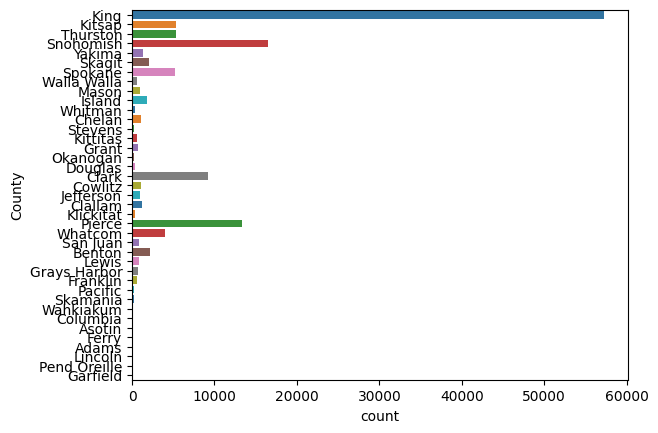

In [ ]:
# Bar plot, count plot, pie chart
sns.countplot(df,y="County",palette="tab10")

In [ ]:
# Generate pie chart


**Observations on County Column:**

1. Data is avaialable for total 39 Counties

2. King Holds mejority  number of vehicles vehicles (41.42 percentage)

3. More than 70% of vehicles are existing in King, Snomish, Pierce, clarke regions.

4. In Garfield and columbia less than 20 vehicles are reported in the data.

# **Model Year Columns**

In [ ]:
df["Model Year"].nunique()

21

In [ ]:
df["Model Year"].unique()

array([2016, 2018, 2024, 2015, 2019, 2020, 2012, 2013, 2022, 2023, 2017,
       2014, 2021, 2000, 2025, 2011, 2026, 2010, 2008, 2002, 2003])

In [ ]:
df["Model Year"].value_counts()

,count
Model Year,
2024,27020
2023,24924
2022,15903
2025,12304
2021,11010
2020,8365
2018,7971
2019,6853
2017,6337


/tmp/ipython-input-56-3060883162.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,y="Model Year",palette="tab10")


<Axes: xlabel='count', ylabel='Model Year'>

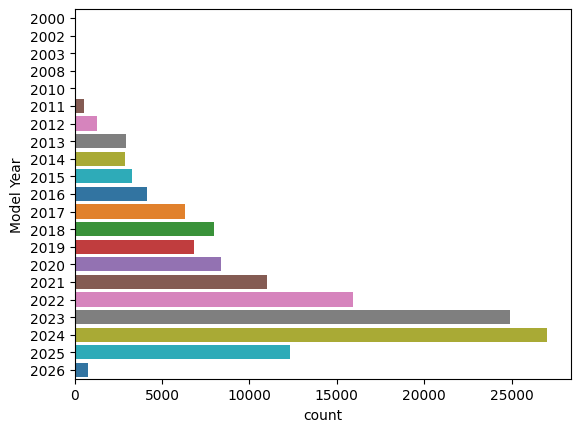

In [ ]:
sns.countplot(df,y="Model Year",palette="tab10")

In [ ]:
# Create pie chart for the above

# **Observations:**

1. Prior to 2015 electrical vehicles are not much preferred.

2. from 2016 considerable growth can be observed in electrical vehicles usage.

3. from 2020 the demand for electrical vehicles is increasing rapidly.

4. As 2025 is on going year, complete data is not possible.

5. We can also observe some electric vehicles in the year 2026, it may indicate pre booking.

6. This indicate, in future there will be huge demand for electric vahicles.

# **City:**

In [ ]:
df["City"].value_counts()

,count
City,
Seattle,20521
Vancouver,5702
Bellevue,4704
Tacoma,3809
Bothell,3333
...,...
Stratford,1
Incorporated,1
McChord AFB,1


<Axes: xlabel='count', ylabel='City'>

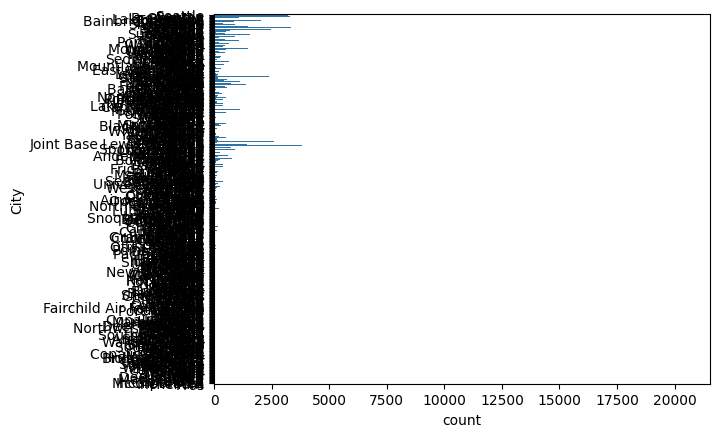

In [ ]:
sns.countplot(df,y="City")

In [ ]:
# Let us convert value_counts into percentage values
f=df["City"].value_counts(normalize=True)
type(f)

pandas.core.series.Series

In [ ]:
f

,proportion
City,
Seattle,0.150267
Vancouver,0.041753
Bellevue,0.034445
Tacoma,0.027892
Bothell,0.024406
...,...
Stratford,0.000007
Incorporated,0.000007
McChord AFB,0.000007


In [ ]:
L=f.nlargest(3)

,proportion
City,
Seattle,0.150267
Vancouver,0.041753
Bellevue,0.034445


In [ ]:
f.nsmallest(5)

,proportion
City,
Lakeview,0.000007
Orient,0.000007
Rich,0.000007
Glenwood,0.000007
Silver Lake,0.000007


In [ ]:
f1=f/len(df)

In [ ]:
len(df)

136564

In [ ]:
len(f)

487

In [ ]:
20521/len(df)

0.15026654169473652

# **Bivariate Analysis**

In [ ]:
summary1=pd.pivot_table(data=df,index="Model Year",columns="Model",values="2020 Census Tract",aggfunc="mean")